# Predicting LendingClub Loan Status

by Iñigo Martiarena Conde and Carlos Rodríguez-Viña Martínez

## Introduction

LendingClub is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform.

Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.



## Goal

The goal of this project is to build a machine learning model to predict the probability that a loan will charge off. We will attempt to only use data available to investors via the LendingClub loan listing, including information about the borrower (income, employment length, FICO score, debt-to-income ratio, etc.) and the loan listing (the loan amount, loan purpose, loan grade, interest rate, installment, etc.). Such a predictive model could help LendingClub investors make better-informed investment decisions. We will only consider loans that LendingClub accepted under its credit underwriting policy.

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

## Import Data

In [2]:
data1 = pd.read_csv('../data/Loan_training_set_1_4.csv', skiprows = 1, skipfooter = 4, engine = 'python')
data2 = pd.read_csv('../data/Loan_training_set_2_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')
data3 = pd.read_csv('../data/Loan_training_set_3_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')
data4 = pd.read_csv('../data/Loan_training_set_4_4.csv', skiprows = 1, skipfooter = 2, engine = 'python')

Comprobamos el encabezado y la parte final de cada tabla con los archovos csv para corroborar que hemos seleccionado bien todo el contenido de la tabla

In [3]:
data1.head() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300,2300,2300,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000,16000,16000,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,
2,112436985,NaN,6025,6025,6025,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400,20400,20400,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000,13000,13000,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1.tail() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
105446,102556443,NaN,24000,24000,24000,60 months,23.99%,690.30,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
105447,102653304,NaN,10000,10000,10000,36 months,7.99%,313.32,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
105448,102628603,NaN,10050,10050,10050,36 months,16.99%,358.26,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
105449,102196576,NaN,6000,6000,6000,36 months,11.44%,197.69,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
105450,99799684,NaN,30000,30000,30000,60 months,25.49%,889.18,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data2.head() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,118659541,NaN,33000,33000,33000,36 months,7.21%,1022.12,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,119321612,NaN,40000,40000,40000,60 months,15.05%,952.65,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,120122535,NaN,12000,12000,12000,36 months,7.97%,375.88,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,119246018,NaN,7000,7000,7000,36 months,7.97%,219.26,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,119374887,NaN,32000,32000,32000,36 months,11.99%,1062.71,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data2.tail() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
122696,110380307,NaN,6000,6000,6000,36 months,23.88%,235.02,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
122697,110479222,NaN,20000,20000,20000,60 months,26.30%,602.37,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
122698,109866673,NaN,35000,35000,35000,60 months,30.89%,1151.58,G,G3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
122699,110394553,NaN,30775,30775,30525,60 months,30.65%,1008.00,F,F4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
122700,109517381,NaN,18900,18900,18900,60 months,30.94%,622.44,G,G4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data3.head() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425,21425,21425,60 months,15.59%,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650,7650,7650,36 months,13.66%,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data3.tail() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
235624,8598660,NaN,18400,18400,18400,60 months,14.47%,432.64,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
235625,9684700,NaN,22000,22000,22000,60 months,19.97%,582.50,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
235626,9604874,NaN,2000,2000,2000,36 months,7.90%,62.59,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
235627,9584776,NaN,20700,20700,20700,60 months,16.99%,514.34,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
235628,9199665,NaN,10000,10000,9975,36 months,19.20%,367.58,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data4.head() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68506789,NaN,12000,12000,12000.0,60 months,9.80%,253.79,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68426545,NaN,16000,16000,16000.0,60 months,12.88%,363.07,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68394562,NaN,30000,30000,30000.0,36 months,15.77%,1051.31,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66583801,NaN,33600,33600,33600.0,36 months,10.78%,1096.53,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68466916,NaN,25000,25000,25000.0,36 months,7.49%,777.55,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data4.tail() # nos sirve para comprobar que hemos cogido todos los datos de cada una de las tablas

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
421090,36371250,NaN,10000,10000,10000.0,36 months,11.99%,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421091,36441262,NaN,24000,24000,24000.0,36 months,11.99%,797.03,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421092,36271333,NaN,13000,13000,13000.0,60 months,15.99%,316.07,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421093,36490806,NaN,12000,12000,12000.0,60 months,19.99%,317.86,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421094,36271262,NaN,20000,20000,20000.0,36 months,11.99%,664.20,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
fields = ['LoanStatNew', 'Description']
dictionary = pd.read_csv('../data/LCDataDictionary.csv', skipfooter = 2, usecols = fields, engine = 'python')
dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


# Agrupacion

Comprabamos que el numero de columnas es el mismo a la hora de concatenar

In [12]:
data1.shape, data2.shape, data3.shape, data4.shape 

((105451, 151), (122701, 151), (235629, 151), (421095, 151))

Concatemos los 4 dataframes en uno solo

In [13]:
data = pd.concat([data1, data2, data3, data4])

Analizamos la estructura y la tipologia de cada una de sus variables

In [14]:
data.shape 

(884876, 151)

In [15]:
data_types = data.dtypes.value_counts() 
data_types


float64    67
int64      44
object     40
dtype: int64

# EDA

We are going to proceed to do a EDA of our database to be more familiarize with it, and to get a better understanding of the data inside of it

<ipython-input-16-7662c7d21840>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(324)


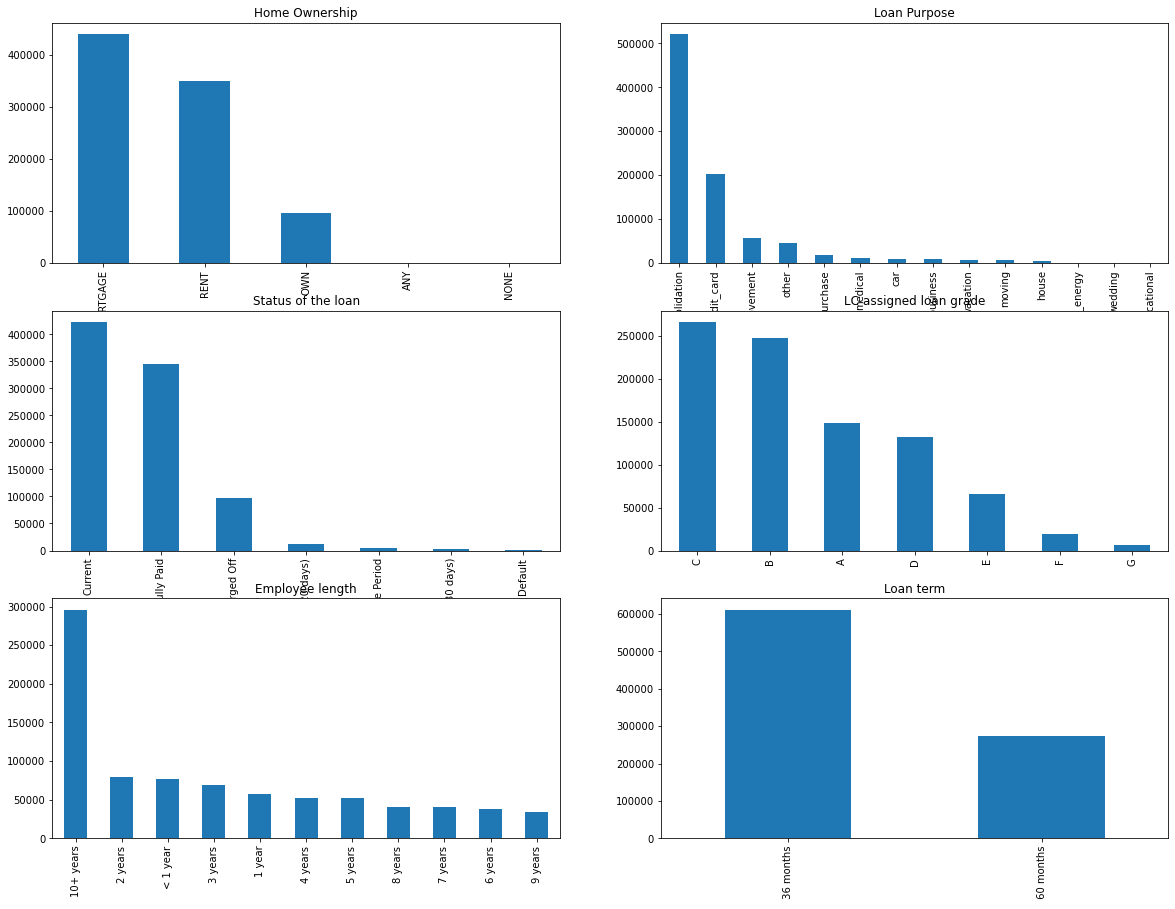

In [16]:
plt.figure(1)
plt.subplot(321) # bar plot with the number of loans for each category of home ownership
data.home_ownership.value_counts().plot.bar(figsize=(20,15), title= 'Home Ownership')

plt.subplot(322) # bar plot with the number of borrowers within each category of loan purpose
data.purpose.value_counts().plot.bar(title= 'Loan Purpose')

plt.subplot(323)
data.loan_status.value_counts().plot.bar(title= 'Status of the loan')

plt.subplot(324)
data.grade.value_counts().plot.bar(title= 'LC assigned loan grade')

plt.subplot(324)
data.grade.value_counts().plot.bar(title= 'LC assigned loan grade')

plt.subplot(325)
data.emp_length.value_counts().plot.bar(title= 'Employee length')

plt.subplot(326)
data.term.value_counts().plot.bar(title= 'Loan term')

plt.show(324)

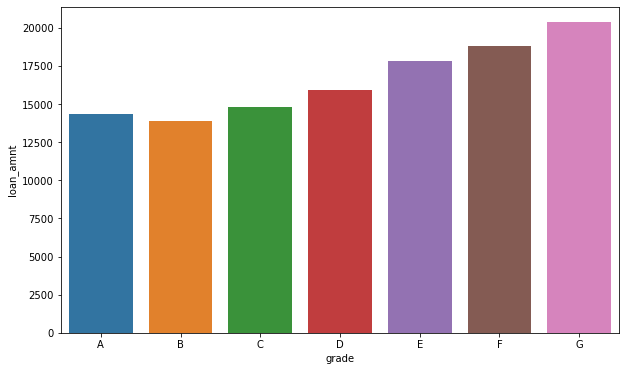

In [17]:
loan_by_grade = data.groupby("grade").mean()
avg_loan = loan_by_grade['loan_amnt'].reset_index()
plt.subplots(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan);

Machine Learning algorithms do not reflect categorical variables or null values, for that particulary reason we are require to proceed with a cleanse of our dataset before we can start building our models.

The cleaning treatment goes as it follows:
 
 - Target Variable
 - Null Analysis
 - Diferenciation between categorial and numeric variables
 - Feature Engineering
 - Encoding

# Target

Our objective is to create a model that predicts fully paid loans or charged off loans based on historic data assembled by Lending Club.

Loan status is the categorical variable that indicates the status of the loan, which has 7 different values:

- __Fully Paid__: Fully paid loan
- __Charged off__: Loan that the bank is not going to recover.
- __Current__: Loan whith all the schedule payments
- __Late (31-120 days)__: Loan with 31-120 days delay
- __In Grace Period__: Loan past due but with 15 days of grace period
- __Late (16 -30 days)__: Loan with 16-30 days delay    
- __Default__: Loan with more than 120 days delay.

"In Grace in Period" and "Current" are values that as to day are still being process, so we dont know the final outcome, so for the purpose of our work they are going to be eliminated.


As our target is to know when to give a loan or not, we are going to consider "Default","Late (16-30 days)" and "Late (31-120 days") as "Charged Off", eventhough there is still a chance to be paid, as a bank it is not necessary for me to find my self in this predictment.




__Distribution Loan Status__

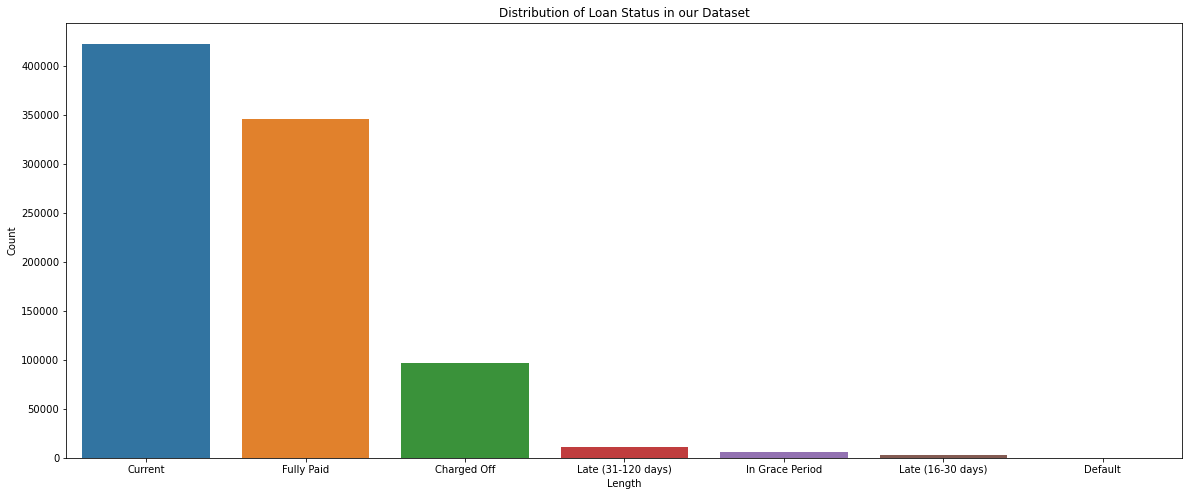

In [18]:
m =data['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

In [19]:
data['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

We create a binary variable "Fully Paid" = 1 and 0 for the rest.

In [20]:
data['Target'] = [1 if i=='Fully Paid' else 0 for i in data['loan_status']]
data['Target'].value_counts()

0    539356
1    345520
Name: Target, dtype: int64

After eliminating "Current" and "In Grace Period", we have now a new dataset of __456.684_ observations with a __152__ variables in contrast with our previous one wiht __884.876__ observations

In [21]:
data = data[(data['loan_status'] != 'Current') & (data['loan_status'] != 'In Grace Period')]
data.shape

(456684, 152)

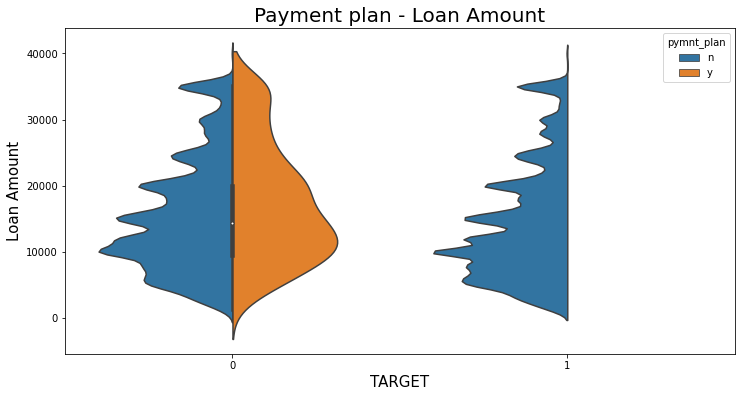

In [22]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="Target",y="loan_amnt",data=data, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

As we can see people in default has nos payment plan

### Distributions of the main variables

Some basic plots to understand variable distribution- Univariate and bivariate relationships

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

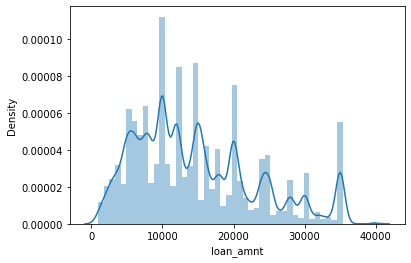

In [23]:
sns.distplot(data['loan_amnt'])

C:\Users\carlo\Anaconda3\envs\LendingGroup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

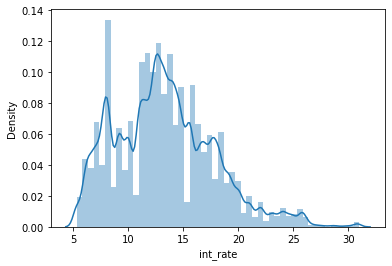

In [24]:
data['int_rate']=data['int_rate'].astype(str)
data['int_rate']= data['int_rate'].map(lambda x: x.rstrip('%'))
data['int_rate']= data['int_rate'].astype(float)
data['int_rate'].describe() # 5-30.9
buck = [0, 5, 10, 15, 20,25, 35]
lab = ['0-5', '5-10', '10-15', '15-20', '20-25','>25']
data['int_rate_range'] = pd.cut(data['int_rate'], buck, labels=lab)
sns.distplot(data['int_rate'])

# Missing values

We want to know exactly how much __null values__ we have in our variables (in%)

In [25]:
def null_values(data):
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("El dataframe tiene " + str(data.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que tienen valores NA.")
        return mis_val_table_ren_columns

In [26]:
miss_values = null_values(data)
miss_values.head(60)

El dataframe tiene 153 columnas.
Hay 74 columnas que tienen valores NA.


,Missing Values,% of Total Values
member_id,456684,100.0
sec_app_mths_since_last_major_derog,456223,99.9
orig_projected_additional_accrued_interest,455848,99.8
sec_app_revol_util,455544,99.8
revol_bal_joint,455516,99.7
sec_app_fico_range_high,455516,99.7
sec_app_earliest_cr_line,455516,99.7
sec_app_inq_last_6mths,455516,99.7
sec_app_mort_acc,455516,99.7
sec_app_open_acc,455516,99.7


We eliminate those columns that have less than 20% of values.

In [27]:
count_20 = len(data) * 0.20 
data = data.dropna(thresh = count_20, axis = 1) 

In [28]:
data.shape # se han reducido las variables considerablemente

(456684, 99)

After cleaning the null values, we have a new dataset of __456.684__ observations and __98__ variabelses

# Categorical Variables

We identify the categorical variables in our dataset, and we proceed to analyze them in order to conclude if they are relevant for our work o not.

In [29]:
cat_features = data.select_dtypes(include = ["object", "category"]).columns
list(cat_features)

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'int_rate_range']

We proceed to eliminate the following variables as they dont throw any light into our analysis.

In [30]:
data.drop(['term', 
            'sub_grade', 
            'emp_title', 
            'issue_d', 
            'url', 
            'purpose',
            'title',
            'addr_state',
            'earliest_cr_line',
            'revol_util',
            'last_pymnt_d',
            'disbursement_method'], axis = 1, inplace = True)

We need to understand the different values our categorical variables have, so that we are able to transform/eliminate or to engineer them for our model

In [31]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

zip_code                911
last_credit_pull_d       85
emp_length               11
grade                     7
loan_status               5
home_ownership            4
verification_status       3
debt_settlement_flag      2
hardship_flag             2
application_type          2
initial_list_status       2
pymnt_plan                2
dtype: int64

Also, Principal Component Analysis can be carried out for the one-hot encoded columns to bring the feature dimensions down_



In [32]:
data['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [33]:
data['home_ownership'].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'ANY'], dtype=object)

In [34]:
data['grade'].unique()

array(['A', 'E', 'C', 'G', 'B', 'D', 'F'], dtype=object)

In [35]:
data['emp_length'].unique()

array(['6 years', '2 years', '7 years', '10+ years', '3 years',
       '< 1 year', '9 years', '4 years', '1 year', '5 years', nan,
       '8 years'], dtype=object)

In [36]:
data.shape

(456684, 87)

After working with the categorical varaibles, we have now a dataset with __456.684__ observations and __86__ variable

# Numeric Variable

We analize the correlation between the numeric variable form our dataset.

In [37]:
correlationList = data.corr().unstack().sort_values(ascending = False).drop_duplicates()
correlationList.head(35)

Target                          Target                            1.000000
fico_range_low                  fico_range_high                   1.000000
out_prncp_inv                   out_prncp                         0.999998
total_pymnt                     total_pymnt_inv                   0.999997
loan_amnt                       funded_amnt_inv                   0.999996
open_acc                        num_sats                          0.998551
num_actv_rev_tl                 num_rev_tl_bal_gt_0               0.982906
tot_cur_bal                     tot_hi_cred_lim                   0.977360
collection_recovery_fee         recoveries                        0.974718
total_rec_prncp                 total_pymnt_inv                   0.971533
total_pymnt                     total_rec_prncp                   0.971529
funded_amnt                     installment                       0.951971
funded_amnt_inv                 installment                       0.951953
mths_since_recent_revol_d

We have decided that for those numeric variables that have at least 80% of correlation, we eliminate one of the two, we have established a threshold of 80%.

In [38]:
data.drop(["mths_since_recent_revol_delinq",
            "tot_hi_cred_lim",
            "avg_cur_bal",
            "total_pymnt_inv",
            "total_rec_prncp",
            "total_pymnt",
            "num_op_rev_tl",
            "open_acc",
            "acc_now_delinq",
            "total_rev_hi_lim",
            "num_bc_sats",
            "last_fico_range_low",
            "bc_open_to_buy",
            "num_rev_accts",
            "percent_bc_gt_75",
            "total_bal_ex_mort",
            "mths_since_recent_bc_dlq",
            "funded_amnt_inv",
            "funded_amnt",
            "recoveries",
            "num_rev_tl_bal_gt_0",
            "fico_range_low",
            "out_prncp_inv",], axis = 1, inplace = True)

In [39]:
data.shape

(456684, 64)

Now the dataset has the following size __456.684__ observations and __63__ variables.

# Feature engineering

We have concluded the cleaning of our dataset by information they shed into our objective, now we are going to proceed to do another cleaning, but now from our business knowledge of the lending market 

### a) Business Knowledge

In [40]:
data.drop(["zip_code",
           "total_rec_late_fee",
           "total_rec_int",
           "out_prncp",
           "num_bc_tl",
           "num_accts_ever_120_pd",
           "mths_since_recent_inq",
           "mths_since_recent_bc",
           "mths_since_last_major_derog",
           "mo_sin_rcnt_tl",
           "mo_sin_rcnt_rev_tl_op",
           "mo_sin_old_rev_tl_op",
           "mo_sin_old_il_acct",
           "id",
           "inq_last_6mths",
           'mths_since_last_delinq',
           'last_credit_pull_d',
          'tax_liens',
          'int_rate',
          'hardship_flag',
          'application_type',
          'policy_code',
          'collections_12_mths_ex_med',
          'collection_recovery_fee',
          'pymnt_plan',
          'loan_status'], axis = 1, inplace = True)

All this variables have been eliminated from our dataset for two reasons:

    1) We have variables that includes variables, such as int_rate which is included in grade.
    2) If its information relevant in the process of giving out a loan.

After reviewing this parameters, we have concluded that the variables above didnt meet the requirements and so they have to be eliminated.


In [41]:
data.shape

(456684, 38)

Our final dataset, the one that we are going to use in our project contains __456.684__ observations and __38__ variables

### b) Missing values

El numero de NAs que tenemos en el dataset es de __xxx__ una vez reducidas las varibles representa un __xx%__. No seria necesario la sustitucion de estos por un estadistico, pues la muestra de observaciones restantes es suficiente para que los modelos puedan predecir con precision

In [42]:
miss_values = null_values(data)
miss_values.head()

El dataframe tiene 38 columnas.
Hay 4 columnas que tienen valores NA.


,Missing Values,% of Total Values
emp_length,24841,5.4
num_tl_120dpd_2m,19093,4.2
bc_util,5113,1.1
dti,20,0.0


In [43]:
data = data.dropna()

In [44]:
data.shape

(409404, 38)

Al eliminar las variables que por logica de negocio no aportaban al analisis, o que se solapaban sus significados, pasamos de tener un dataframe de __456.684__ observaciones y __46__ variables, a uno con __409.404__ observaciones y __38__ variables

### c) Variables categoricas

Las variables categoricas restantes

In [45]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

emp_length              11
grade                    7
home_ownership           4
verification_status      3
debt_settlement_flag     2
initial_list_status      2
dtype: int64

#### c.1) Empleo

In [46]:
mapping_empleo = {
"emp_length": {"10+ years": 10, "9 years": 9, "8 years": 8, "7 years": 7, "6 years": 6,
               "5 years": 5, "4 years": 4, "3 years": 3, "2 years": 2, "1 year": 1, "< 1 year": 0,
               "n/a": 0}
}

In [47]:
data = data.replace(mapping_empleo)

#### c.2) Grade

In [48]:
mapping_grade = {
    "grade": {"A": 1, "B": 2,"C": 3,"D": 4,"E": 5, "F": 6, "G": 7}
}

In [49]:
data = data.replace(mapping_grade)

In [50]:
data.head()

,loan_amnt,installment,grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,fico_range_high,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,Target,int_rate_range
8,11575,359.26,1,6,OWN,153000.0,Not Verified,16.99,0,724,...,0,0,2,95.7,1,28100,120572,N,1,5-10
10,7200,285.70,5,2,RENT,50000.0,Source Verified,6.07,0,689,...,0,0,0,80.0,0,3600,4000,N,1,20-25
24,7500,232.79,1,7,MORTGAGE,110000.0,Not Verified,13.12,0,714,...,0,0,3,100.0,0,83700,32239,N,1,5-10
42,10000,243.29,3,7,RENT,51979.0,Source Verified,10.11,0,694,...,0,0,3,100.0,2,18800,5500,N,1,15-20
91,14000,492.34,3,7,MORTGAGE,75000.0,Verified,10.86,1,689,...,0,0,3,90.0,0,3000,30321,N,1,15-20


# Encoding

one - hot - encoding

In [51]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

home_ownership          4
verification_status     3
debt_settlement_flag    2
initial_list_status     2
dtype: int64

In [52]:
data_encoded = pd.get_dummies(data, columns=['emp_length',
                            'grade',
                             'verification_status',
                             'home_ownership',
                             'debt_settlement_flag',
                             'initial_list_status'
                            ])
data_encoded.head()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_high,pub_rec,revol_bal,total_acc,last_pymnt_amnt,...,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,debt_settlement_flag_N,debt_settlement_flag_Y,initial_list_status_f,initial_list_status_w
8,11575,359.26,153000.0,16.99,0,724,1,8550,46,11360.38,...,0,0,0,0,1,0,1,0,0,1
10,7200,285.70,50000.0,6.07,0,689,0,3560,5,7231.31,...,1,0,0,0,0,1,1,0,0,1
24,7500,232.79,110000.0,13.12,0,714,0,23348,27,7184.37,...,0,0,0,1,0,0,1,0,0,1
42,10000,243.29,51979.0,10.11,0,694,2,5733,21,10048.95,...,1,0,0,0,0,1,1,0,0,1
91,14000,492.34,75000.0,10.86,1,689,0,2700,10,13913.95,...,0,1,0,1,0,0,1,0,0,1


In [53]:
data_encoded.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

Series([], dtype: float64)

### Exportamos el Dataset

In [54]:
data_encoded.to_csv('data_modelos.csv', index=False)